In [14]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
INFO = 'INFY'
NIFTY = '^NSEI'
Info_d = yf.download(INFO, start='2022-09-13', end='2023-09-13')
Nifty_d = yf.download(NIFTY, start='2022-09-13', end='2023-09-13')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
print(Info_d)

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-09-13  18.760000  18.900000  18.490000  18.559999  18.115257  15227800
2022-09-14  18.370001  18.440001  17.969999  18.080000  17.646759  16757300
2022-09-15  17.700001  17.809999  17.510000  17.790001  17.363710  21950100
2022-09-16  17.200001  17.459999  17.090000  17.379999  16.963533  42686600
2022-09-19  17.410000  17.520000  17.290001  17.410000  16.992815  15219300
...               ...        ...        ...        ...        ...       ...
2023-09-06  17.690001  17.750000  17.549999  17.580000  17.580000   5049300
2023-09-07  17.549999  17.600000  17.480000  17.520000  17.520000   5920700
2023-09-08  17.620001  17.760000  17.580000  17.750000  17.750000   5796800
2023-09-11  17.840000  17.950001  17.740000  17.950001  17.950001   5196600
2023-09-12  18.040001  18.180000  18.010000  18.059999  18.059999   6611926

[251 rows x

In [5]:
cinfo = Info_d['Adj Close']
cnifty = Nifty_d['Adj Close']

infor = cinfo.pct_change().dropna()
niftyr = cnifty.pct_change().dropna()

infocr = (1+infor).cumprod()
niftycr = (1+niftyr).cumprod()


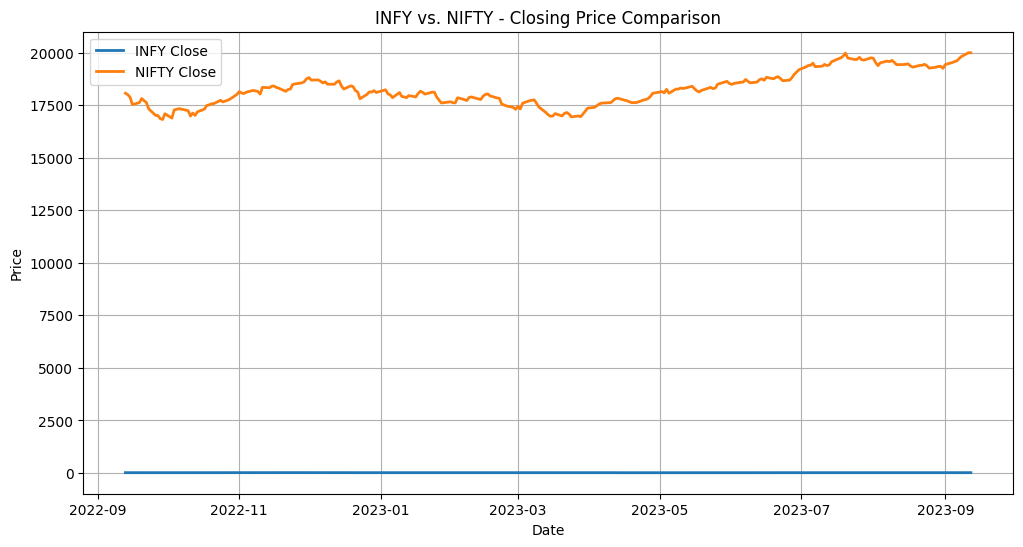

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(cinfo, label=f'{INFO} Close', linewidth=2)
plt.plot(cnifty, label=f'NIFTY Close', linewidth=2)
plt.title(f'{INFO} vs. NIFTY - Closing Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

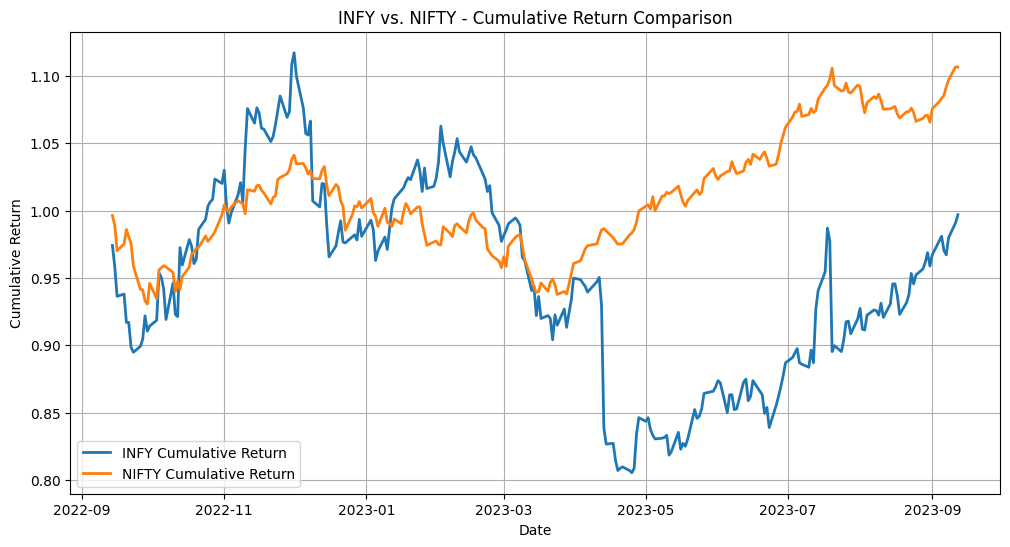

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(infocr, label=f'{INFO} Cumulative Return', linewidth=2)
plt.plot(niftycr, label=f'NIFTY Cumulative Return', linewidth=2)
plt.title(f'{INFO} vs. NIFTY - Cumulative Return Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)

In [9]:
data = pd.DataFrame({'Stock_Returns': infor, 'NIFTY_Returns': niftyr,'Stock_Cumulative_Return':infocr,'NIFTY_Cumulative_Return':niftycr})

In [16]:
risk_free_rate = 0.06
# Calculate the excess returns of the stock and NIFTY index over the risk-free rate
data['Stock_Excess_Returns'] = data['Stock_Returns'] - risk_free_rate
data['NIFTY_Excess_Returns'] = data['NIFTY_Returns'] - risk_free_rate

# Handle missing values
data = data.dropna()

# Perform linear regression for CAPM analysis
X = data['NIFTY_Excess_Returns'].values.reshape(-1, 1)
y = data['Stock_Excess_Returns'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)



LinearRegression()

In [17]:
beta = model.coef_[0][0]
alpha = model.intercept_[0]
r_squared = model.score(X, y)

print(f'Beta (Market Risk): {beta}')
print(f'Alpha: {alpha}')
print(f'R-squared Value: {r_squared}')


Beta (Market Risk): 0.680630402660539
Alpha: -0.019418225263257094
R-squared Value: 0.07768647444135457


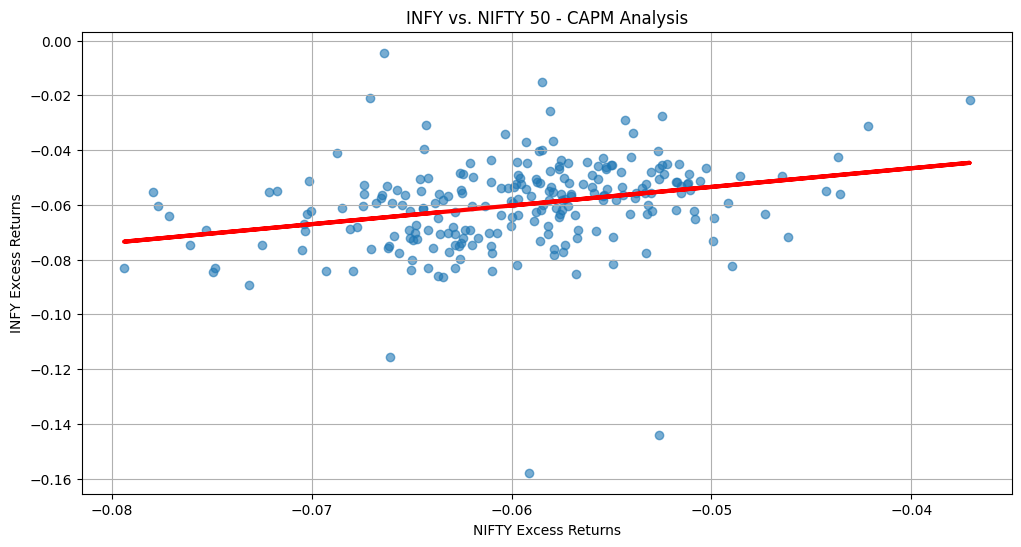

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(data['NIFTY_Excess_Returns'], data['Stock_Excess_Returns'], alpha=0.6)
plt.plot(data['NIFTY_Excess_Returns'], model.predict(X), color='red', linewidth=3)
plt.title(f'{INFO} vs. NIFTY 50 - CAPM Analysis')
plt.xlabel('NIFTY Excess Returns')
plt.ylabel(f'{INFO} Excess Returns')
plt.grid(True)
plt.show()